### 000000 playground

##### Playground

In [210]:
ticker = '603816'

In [211]:
%%html
<style>
table {float:left}
</style>

In [212]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import baostock

sys.path.append(os.path.join(os.path.expanduser('~'), 'GitHub', 'stock'))
import script.data as data
import script.utils as utils
import script.bsutil as bu
from script.figure import draw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [213]:
baostock.login()
code = bu.get_bs_code(ticker)
income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)
mkt = bu.get_price_daily(code)
bs = data.get_BS(ticker)
baostock.logout()

login success!
logout success!


In [214]:
change = utils.column_pct(income[['营业总收入', '营业总成本', '归属于母公司所有者的净利润']], periods=-1)
income_change = pd.concat([income[['截止日期', '基本每股收益', '稀释每股收益']], change], axis=1)
income_change.set_index('截止日期')

,基本每股收益,稀释每股收益,营业总收入,营业总成本,归属于母公司所有者的净利润
截止日期,,,,,
2019-12-31,1.98,1.97,"11,093,593,126 ( 20.9%)","9,973,127,290 ( 22.9%)","1,161,162,368 ( 17.4%)"
2018-12-31,1.68,1.68,"9,172,118,015 ( 37.6%)","8,112,492,883 ( 37.2%)","989,359,857 ( 20.3%)"
2017-12-31,1.99,1.99,"6,665,443,958 ( 39.0%)","5,912,668,991 ( 42.6%)","822,445,572 ( 43.0%)"
2016-12-31,1.67,1.67,"4,794,534,972 ( 30.1%)","4,146,432,238 ( 32.7%)","575,051,539 ( 15.4%)"
2015-12-31,1.51,1.51,"3,684,846,010 ( 13.7%)","3,124,054,565 ( 14.8%)","498,311,897 ( 17.4%)"
2014-12-31,1.29,1.29,"3,239,713,900 ( 20.8%)","2,720,389,500 ( 21.7%)","424,370,500 ( 5.1%)"
2013-12-31,1.22,1.22,"2,681,748,200 ( nan%)","2,234,584,200 ( nan%)","403,630,500 ( nan%)"


In [215]:
change = utils.column_pct(incomeq[['营业收入', '归属于母公司所有者的净利润']], periods=-4)
incomeq_change = pd.concat([incomeq[['截止日期']], change], axis=1)
incomeq_change[:24].set_index('截止日期')

,营业收入,归属于母公司所有者的净利润
截止日期,,
2020-09-30,"3,683,341,892 ( 33.2%)","433,957,113 ( 21.1%)"
2020-06-30,"2,573,653,103 ( 0.9%)","269,203,850 ( 2.2%)"
2020-03-31,"2,287,724,915 ( -7.0%)","306,628,663 ( 3.8%)"
2019-12-31,"3,318,807,623 ( 19.4%)","244,043,608 ( 19.7%)"
2019-09-30,"2,764,603,808 ( 17.9%)","358,410,233 ( 18.3%)"
2019-06-30,"2,550,419,955 ( 16.1%)","263,323,568 ( 23.0%)"
2019-03-31,"2,459,761,740 ( 32.8%)","295,384,960 ( 10.0%)"
2018-12-31,"2,779,157,438 ( 52.9%)","203,819,252 ( 0.7%)"
2018-09-30,"2,343,948,074 ( 34.9%)","303,033,738 ( 30.6%)"


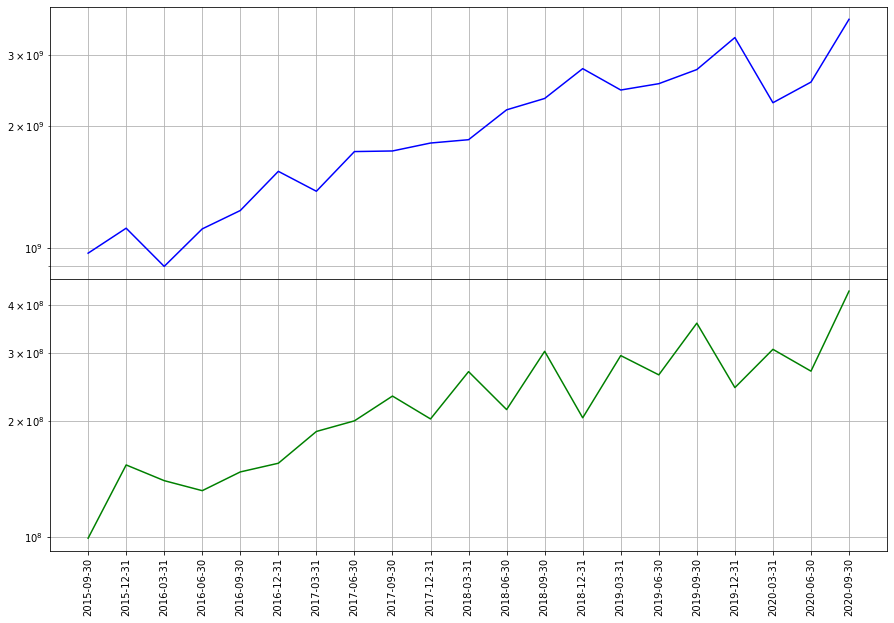

In [216]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['归属于母公司所有者的净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [217]:
income['毛利率'] = (1 - income['营业成本'] / income['营业收入']).round(3) * 100
income['净利率'] = (income['净利润'] / income['营业总收入']).round(3) * 100
income.set_index('截止日期')[['毛利率', '净利率']]

,毛利率,净利率
截止日期,,
2019-12-31,34.9,11.0
2018-12-31,36.4,11.0
2017-12-31,37.3,12.5
2016-12-31,40.4,11.9
2015-12-31,41.1,13.3
2014-12-31,40.7,13.0
2013-12-31,40.0,14.9


In [218]:
change = utils.column_pct(bs[['存货', '应付账款', '应收账款']], periods=-1)
bs_change = pd.concat([bs[['截止日期']], change], axis=1)
bs_change.set_index('截止日期', inplace=True)
change = utils.column_pct(income[['营业收入']], periods=-1)
income_change = pd.concat([income[['截止日期']], change], axis=1)
income_change.set_index('截止日期', inplace=True)
pd.concat([income_change, bs_change], axis=1)

,营业收入,存货,应付账款,应收账款
截止日期,,,,
2019-12-31,"11,093,593,126 ( 20.9%)","1,266,113,355 ( 8.9%)","1,279,945,237 ( 42.4%)","1,011,948,010 ( 8.5%)"
2018-12-31,"9,172,118,015 ( 37.6%)","1,162,346,980 ( 32.3%)","898,782,534 ( 63.8%)","932,343,884 (118.0%)"
2017-12-31,"6,665,443,958 ( 39.0%)","878,361,478 ( 28.5%)","548,613,022 ( 24.5%)","427,674,039 ( 25.4%)"
2016-12-31,"4,794,534,972 ( 30.1%)","683,492,122 ( 53.2%)","440,574,799 ( 55.7%)","340,975,820 ( 55.9%)"
2015-12-31,"3,684,846,010 ( 13.7%)","446,236,598 (-15.0%)","283,003,570 ( 36.1%)","218,724,890 ( 22.2%)"
2014-12-31,"3,239,713,900 ( 20.8%)","524,797,300 ( 40.1%)","207,862,200 ( 13.0%)","179,008,500 ( 71.3%)"
2013-12-31,"2,681,748,200 ( nan%)","374,660,200 ( nan%)","183,913,900 ( nan%)","104,501,400 ( nan%)"


In [219]:
mkt['前复权'] = mkt['close'].round(2)
mkt['滚动市盈率'] = mkt['peTTM'].round(1)
mkt['交易日期'] = pd.to_datetime(mkt['date'])
df = mkt[['前复权', '滚动市盈率']].groupby(mkt['交易日期'].dt.year).agg(['min', 'max', 'first', 'last'])[-10:]
df['前复权增长'] = df['前复权'][['first', 'last']].apply(lambda x: round((x[1]-x[0])/x[0] * 100,1), axis=1)
df.drop(columns=[('前复权', 'min'), ('前复权', 'max'), ('滚动市盈率', 'first'), ('滚动市盈率', 'last')])


前复权        滚动市盈率       前复权增长
      first   last   min   max      
交易日期                                
2016  23.56  31.41  29.4  48.4  33.3
2017  31.81  39.63  27.9  40.2  24.6
2018  39.32  30.63  18.6  36.0 -22.1
2019  29.86  44.59  16.7  27.0  49.3
2020  45.70  75.48  18.2  41.9  65.2

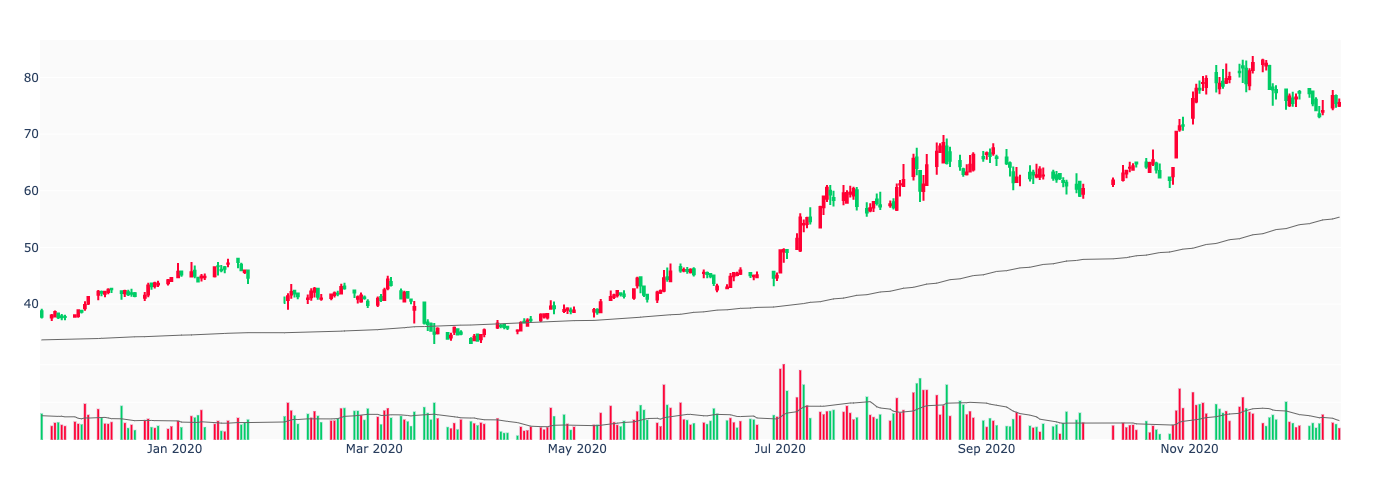

In [220]:
draw(mkt, 260, 200, 20)